### This is a demo creating a word cloud for the most frequently used words in the podcast EconTalk hosted by Russ Roberts. The podcast can be found here:
### https://www.econtalk.org/
### The word cloud is constructed by scraping the EconTalk website's "AUDIO TRANSCRIPT" sections for all podcasts from the beginning of 2008 to March 2024 (the time this code was written). 
### This project uses the wordcloud and nltk packages. An additional package 'scrape_tools' contains helper functions for scraping and filtering the transcripts.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from os import path, getcwd
from PIL import Image

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [2]:
import scrape_tools as h

In [3]:
# We choose to use podcasts starting from 2008 because earlier episodes are transcribed
# inconsistently.

GrandURL = "https://www.econlib.org/econtalk-archives-by-date/"
link_template = "https://www.econtalk.org/"

latest = 2024
earliest = 2008
content_filter = "?selected_year={}#content"

In [4]:
# Scrape all transcripts from all apisodes between 2008 and 2024.
# Note: this block may take several minutes to execute.

all_episodes = []

for year in range(latest, earliest-1, -1):
    html_soup = h.get_soup(GrandURL+content_filter.format(year))
    episode_links = h.get_links(html_soup)

    for ep in episode_links:
        all_episodes.append(h.episode_transcript(ep))

grand_text = h.get_text(all_episodes)
grand_text_filtered = h.punctuation_stop(grand_text)

In [20]:
# Additional unwanted words not already in built-into nltk.corpus.stopwords.
# Note: code in preceding blocks should be compiled once,
# and the following blocks should be altered and ran separately if needed to save runtime.

IGNORE_WORDS=['russ', 'roberts', 'episode', 'podcast', 'date', 'today', 'recording',
              'guest', 'timepodcast', 'ca', 'intro', 'way', 'got', 'u',
              'really', 'even', 'go', 'lot', 'come', 'put', 'thing', 'something', 'maybe'
]

In [21]:
grand_text_filtered = [w for w in grand_text_filtered if w not in IGNORE_WORDS]

In [22]:
# We mold the word cloud image using the EconLib logo as a template.
# This particular jpg is the banner photo from the EconTalk YouTube channel:
# https://www.youtube.com/channel/UCKAu-mTq7iZtKHK6QiBqKPA

d = getcwd()
econlib_logo = np.array(Image.open(path.join(d, "econlib_logo.jpg")))

In [23]:
wc = WordCloud(background_color='white', max_words=2000, max_font_size=90, random_state=1,
               stopwords=STOPWORDS, mask=econlib_logo)
wc.generate(h.get_text(grand_text_filtered))
image_colors = ImageColorGenerator(econlib_logo)

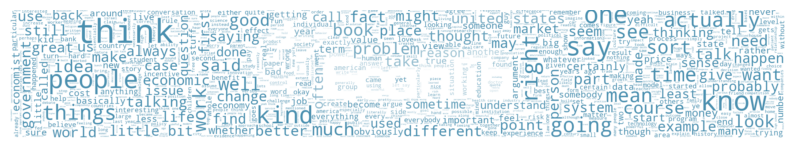

In [24]:
plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

### This image is saved as "EconLib_all_years_wordcloud.png". We have also saved the word cloud for episodes only from 2024, as "EconLib_2024_wordcloud".